# Advance Assignment

## Business Background

We left you in the Intermediate Assignment as a new joiner in an investment platform startup that is currently focused on app-based mutual fund investment. Now assume you already work for the startup for one month, and now it is the end of October 2021 (in your Intermediate Assignment, you were a new joiner in September). You remember at the z of September 2021, the company was starting to offer government bond investment products, in addition to its existing mutual fund products. Existing users in September responded enthusiastically to the communication program you helped devised (in Intermediate Assignment) YEY!

In early 2022, the company will offer another round of government bond investment. Based on the September bond campaign, the company decided to make further investments and run targeted advertising to existing users in October. However, the budget for the campaign is only enough to serve ads to 30% of the total existing users.

Julia now asks you to rank users based on their likelihood or propensity to buy bonds in the next round. Julia also asks you to give her a projection of how profitable the campaign will be for the company. As the data analyst, you're tasked to provide the leads of the top 30% of most prospective users to be targeted. In addition, you will create a simple benefit-cost analysis of the campaign. In this project, you're supported by Bambang , a senior data analyst in your team.

Objective:

- Do campaign for Government Bond and but budget only enough to 30% of existing users

.


## Import Libraries

In [87]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import classification_report, confusion_matrix

## Import datasets

In [88]:
# TRANSACTION DATA
sheet_url = 'https://docs.google.com/spreadsheets/d/1k9-VIRN3pn6bz-nj_NF_caAFFMG-2QAiKw6J2VCI9WI/edit#gid=1937711853'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_trx = pd.read_csv(sheet_url_trf)
df_trx

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,43195,2021-10-06,285066.0,280000.0,NaN,50008.0,50000.0,NaN,170072.0,170000.0,NaN,NaN,NaN,NaN
1,43195,2021-10-07,285377.0,280000.0,0.0,50012.0,50000.0,0.0,170200.0,170000.0,0.0,NaN,NaN,NaN
2,43195,2021-10-08,288188.0,280000.0,0.0,50016.0,50000.0,0.0,169983.0,170000.0,0.0,NaN,NaN,NaN
3,43195,2021-10-11,285988.0,280000.0,0.0,50028.0,50000.0,0.0,169866.0,170000.0,0.0,NaN,NaN,NaN
4,43195,2021-10-12,285988.0,280000.0,0.0,50032.0,50000.0,0.0,169857.0,170000.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401234,4457509,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401235,4457532,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401236,4457596,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401237,4457622,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
#BOND RESULTS DATA
sheet_url = 'https://docs.google.com/spreadsheets/d/12d0pJ_48gP9KV6gV9wsHeas6BdnuWgFLPYocDWmsivo/edit#gid=1254201307'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_bond_sept = pd.read_csv(sheet_url_trf)
df_bond_sept

,user_id,flag_order_bond,bond_units_ordered
0,50701,1,34
1,50961,1,99
2,51883,0,0
3,53759,0,0
4,54759,1,92
...,...,...,...
8479,4173878,0,0
8480,4174045,0,0
8481,4174169,0,0
8482,4174486,0,0


In [90]:
# USERS DATA
sheet_url = 'https://docs.google.com/spreadsheets/d/1kp5B_4vU-L3wNLj79siKGsZ5VGCd--Of2hD6pJqxHIc/edit#gid=215046850'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_users = pd.read_csv(sheet_url_trf)
df_users

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri
14710,4396739,2021-10-21 13:42:20,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji


## Preparing users and govt bond results tables and add new columns that will be used in the model

## Create user vintage per 30 sept and 29 oct

In [91]:
df_users['registration_import_datetime'] = pd.to_datetime(df_users['registration_import_datetime'])
df_users['registration_import_datetime'] = df_users['registration_import_datetime'].dt.strftime('%Y-%m-%d')
df_users

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji
14708,4288026,2021-10-15,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya
14709,4286882,2021-10-11,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri
14710,4396739,2021-10-21,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji


In [92]:
# filter to only show users who registered before 30 sept 2021
df_users = df_users[df_users['registration_import_datetime'] <= '2021-09-30']
df_users

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
3,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
5,3049927,2021-08-29,Male,53,Swasta,< 10 Juta,NaN,Gaji
6,1407611,2021-09-23,Male,56,Swasta,> Rp 100 Juta - 500 Juta,NaN,Keuntungan Bisnis
...,...,...,...,...,...,...,...,...
14692,3773859,2021-08-06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Lainnya
14693,3798265,2021-08-09,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis
14694,3670811,2021-08-02,Male,49,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji
14695,3812221,2021-08-11,Male,49,PNS,> Rp 100 Juta - 500 Juta,NaN,Gaji


In [93]:
df_users['vintage_30sept'] = datetime.strptime('2021-09-30', '%Y-%m-%d') - pd.to_datetime(df_users['registration_import_datetime'])
df_users['vintage_30sept'] = df_users['vintage_30sept'].dt.days

df_users['vintage_29oct'] = datetime.strptime('2021-10-29', '%Y-%m-%d') - pd.to_datetime(df_users['registration_import_datetime'])
df_users['vintage_29oct'] = df_users['vintage_29oct'].dt.days

df_users

<ipython-input-93-1a25ad055a30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users['vintage_30sept'] = datetime.strptime('2021-09-30', '%Y-%m-%d') - pd.to_datetime(df_users['registration_import_datetime'])
<ipython-input-93-1a25ad055a30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users['vintage_30sept'] = df_users['vintage_30sept'].dt.days
<ipython-input-93-1a25ad055a30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,vintage_30sept,vintage_29oct
0,162882,2021-09-17,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,13,42
3,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,49,78
4,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,46,75
5,3049927,2021-08-29,Male,53,Swasta,< 10 Juta,NaN,Gaji,32,61
6,1407611,2021-09-23,Male,56,Swasta,> Rp 100 Juta - 500 Juta,NaN,Keuntungan Bisnis,7,36
...,...,...,...,...,...,...,...,...,...,...
14692,3773859,2021-08-06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Lainnya,55,84
14693,3798265,2021-08-09,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,52,81
14694,3670811,2021-08-02,Male,49,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji,59,88
14695,3812221,2021-08-11,Male,49,PNS,> Rp 100 Juta - 500 Juta,NaN,Gaji,50,79


## Merge users data with govt bond

In [94]:
df_bond_sept_users = df_users.merge(df_bond_sept, how='inner',left_on='user_id', right_on='user_id')
df_bond_sept_users

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,vintage_30sept,vintage_29oct,flag_order_bond,bond_units_ordered
0,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,49,78,0,0
1,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,46,75,0,0
2,3049927,2021-08-29,Male,53,Swasta,< 10 Juta,NaN,Gaji,32,61,0,0
3,3836491,2021-08-18,Male,59,Others,< 10 Juta,used referral,Lainnya,43,72,0,0
4,3783302,2021-09-14,Male,57,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji,16,45,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8479,3773859,2021-08-06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Lainnya,55,84,0,0
8480,3798265,2021-08-09,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,52,81,0,0
8481,3670811,2021-08-02,Male,49,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji,59,88,1,18
8482,3812221,2021-08-11,Male,49,PNS,> Rp 100 Juta - 500 Juta,NaN,Gaji,50,79,0,0


## Simple EDA

## Is the data between flag bond 1 and 0 balanced?

Text(0, 0.5, 'quantity')

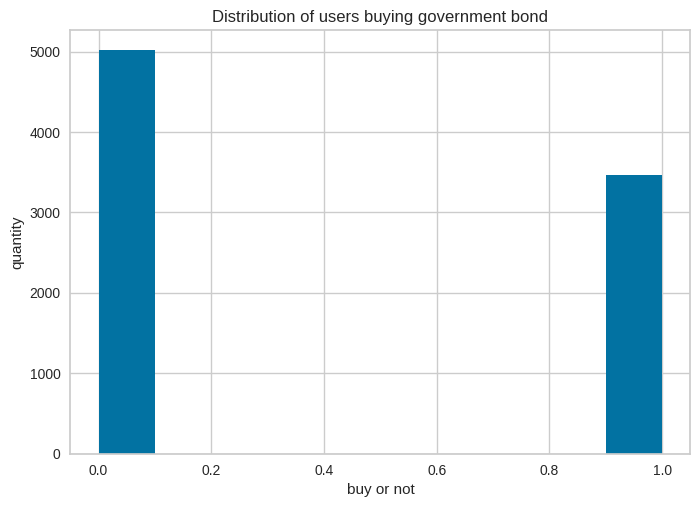

In [95]:
df_bond_sept_users['flag_order_bond'].hist()
plt.title('Distribution of users buying government bond')
plt.xlabel('buy or not')
plt.ylabel('quantity')

#from the graph below, we know that the data is fairly balanced

Text(0, 0.5, 'quantity')

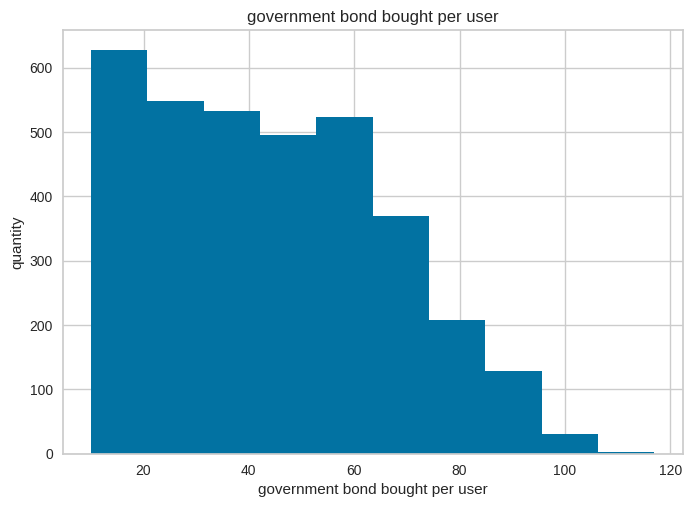

In [96]:
x = df_bond_sept_users['bond_units_ordered'][df_bond_sept_users['flag_order_bond']!=0]

x.hist()
plt.title('government bond bought per user')
plt.xlabel('government bond bought per user')
plt.ylabel('quantity')

#from the graph below, we know that the data is fairly balanced

Text(0, 0.5, 'quantity')

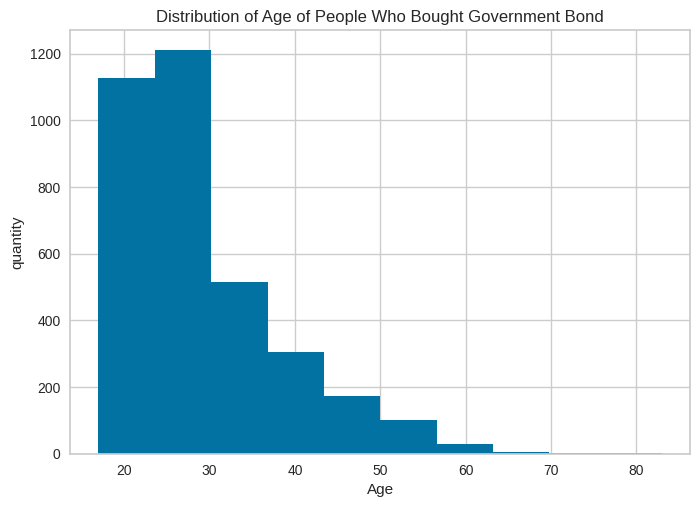

In [97]:
x = df_bond_sept_users['user_age'][df_bond_sept_users['flag_order_bond']!=0]

x.hist()
plt.title('Distribution of Age of People Who Bought Government Bond')
plt.xlabel('Age')
plt.ylabel('quantity')


# Data transformation

for this data transformation we need to split the daily user balance to 2 seperate tables, which are
- end of period september (2021-09-30)
- end of period october (2021-10-29)

## End of period september

In [98]:
#copy daily user balance data
df_endperiod_sept = df_trx.copy()

# only select on end of period (30 sept)
df_endperiod_sept = df_endperiod_sept[df_endperiod_sept['date']=='2021-09-30']
df_endperiod_sept = df_endperiod_sept[['user_id','date',
                                        'Saham_AUM','Saham_invested_amount',
                                        'Pasar_Uang_AUM','Pasar_Uang_invested_amount',
                                        'Pendapatan_Tetap_AUM','Pendapatan_Tetap_invested_amount',
                                        'Campuran_AUM','Campuran_invested_amount']]

df_endperiod_sept = df_endperiod_sept.fillna(0)

#create profit percentage column on each index fund
df_endperiod_sept['Saham_profit_percentage'] = ((df_endperiod_sept['Saham_AUM']/df_endperiod_sept['Saham_invested_amount'])-1)*100
df_endperiod_sept['Pasar_Uang_profit_percentage'] = ((df_endperiod_sept['Pasar_Uang_AUM']/df_endperiod_sept['Pasar_Uang_invested_amount'])-1)*100
df_endperiod_sept['Pendapatan_Tetap_profit_percentage'] = ((df_endperiod_sept['Pendapatan_Tetap_AUM']/df_endperiod_sept['Pendapatan_Tetap_invested_amount'])-1)*100
df_endperiod_sept['Campuran_profit_percentage'] = ((df_endperiod_sept['Campuran_AUM']/df_endperiod_sept['Campuran_invested_amount'])-1)*100

df_endperiod_sept = df_endperiod_sept.fillna(0)

#call the desired columns in order
df_endperiod_sept = df_endperiod_sept[['user_id','date',
                                        'Saham_AUM','Saham_invested_amount','Saham_profit_percentage',
                                        'Pasar_Uang_AUM','Pasar_Uang_invested_amount','Pasar_Uang_profit_percentage',
                                        'Pendapatan_Tetap_AUM','Pendapatan_Tetap_invested_amount','Pendapatan_Tetap_profit_percentage',
                                        'Campuran_AUM','Campuran_invested_amount','Campuran_profit_percentage']]

df_endperiod_sept


,user_id,date,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_profit_percentage,Campuran_AUM,Campuran_invested_amount,Campuran_profit_percentage
58,50701,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,9943587.0,10000000.0,-0.56413
102,50961,2021-09-30,2063909.0,2000000.0,3.195450,700603.0,700000.0,0.086143,1398998.0,1400000.0,-0.071571,0.0,0.0,0.00000
172,53759,2021-09-30,73179.0,70000.0,4.541429,10027.0,10000.0,0.270000,20109.0,20000.0,0.545000,0.0,0.0,0.00000
218,54759,2021-09-30,0.0,0.0,0.000000,12049049.0,12000000.0,0.408742,0.0,0.0,0.000000,0.0,0.0,0.00000
276,61414,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354826,4165020,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000
354885,4165132,2021-09-30,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.00000
355081,4165630,2021-09-30,41625.0,40000.0,4.062500,10001.0,10000.0,0.010000,49869.0,50000.0,-0.262000,0.0,0.0,0.00000
355121,4165704,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,9987.0,10000.0,-0.130000,0.0,0.0,0.00000


## End of period october

In [99]:
#copy daily user balance data
df_endperiod_oct = df_trx.copy()

# only select on end of period (30 sept)
df_endperiod_oct = df_endperiod_oct[df_endperiod_oct['date']=='2021-10-29']
df_endperiod_oct = df_endperiod_oct[['user_id','date',
                                        'Saham_AUM','Saham_invested_amount',
                                        'Pasar_Uang_AUM','Pasar_Uang_invested_amount',
                                        'Pendapatan_Tetap_AUM','Pendapatan_Tetap_invested_amount',
                                        'Campuran_AUM','Campuran_invested_amount']]

df_endperiod_oct = df_endperiod_oct.fillna(0)

#create profit percentage column on each index fund
df_endperiod_oct['Saham_profit_percentage'] = ((df_endperiod_oct['Saham_AUM']/df_endperiod_oct['Saham_invested_amount'])-1)*100
df_endperiod_oct['Pasar_Uang_profit_percentage'] = ((df_endperiod_oct['Pasar_Uang_AUM']/df_endperiod_oct['Pasar_Uang_invested_amount'])-1)*100
df_endperiod_oct['Pendapatan_Tetap_profit_percentage'] = ((df_endperiod_oct['Pendapatan_Tetap_AUM']/df_endperiod_oct['Pendapatan_Tetap_invested_amount'])-1)*100
df_endperiod_oct['Campuran_profit_percentage'] = ((df_endperiod_oct['Campuran_AUM']/df_endperiod_oct['Campuran_invested_amount'])-1)*100

df_endperiod_oct = df_endperiod_oct.fillna(0)

#call the desired columns in order
df_endperiod_oct = df_endperiod_oct[['user_id','date',
                                        'Saham_AUM','Saham_invested_amount','Saham_profit_percentage',
                                        'Pasar_Uang_AUM','Pasar_Uang_invested_amount','Pasar_Uang_profit_percentage',
                                        'Pendapatan_Tetap_AUM','Pendapatan_Tetap_invested_amount','Pendapatan_Tetap_profit_percentage',
                                        'Campuran_AUM','Campuran_invested_amount','Campuran_profit_percentage']]

df_endperiod_oct


,user_id,date,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_profit_percentage,Campuran_AUM,Campuran_invested_amount,Campuran_profit_percentage
17,43195,2021-10-29,280945.0,280000.0,0.337500,50127.0,50000.0,0.254000,170702.0,170000.0,0.412941,0.0,0.0,0.00000
34,47757,2021-10-29,581030.0,600000.0,-3.161667,0.0,0.0,0.000000,9033958.0,9000000.0,0.377311,0.0,0.0,0.00000
79,50701,2021-10-29,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,9637035.0,10000000.0,-3.62965
123,50961,2021-10-29,7632462.0,7110318.0,7.343469,703336.0,700000.0,0.476571,1405335.0,1400000.0,0.381071,969171.0,1000000.0,-3.08290
144,51883,2021-10-29,96927.0,90000.0,7.696667,20036.0,20000.0,0.180000,90331.0,90000.0,0.367778,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401234,4457509,2021-10-29,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.00000
401235,4457532,2021-10-29,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.00000
401236,4457596,2021-10-29,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.00000
401237,4457622,2021-10-29,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.00000


# Data Cleaning

### Users and Transaction Data

#### Drop Irrelevant values

In [100]:
df_bond_sept_users

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,vintage_30sept,vintage_29oct,flag_order_bond,bond_units_ordered
0,3816789,2021-08-12,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,49,78,0,0
1,3802293,2021-08-15,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,46,75,0,0
2,3049927,2021-08-29,Male,53,Swasta,< 10 Juta,NaN,Gaji,32,61,0,0
3,3836491,2021-08-18,Male,59,Others,< 10 Juta,used referral,Lainnya,43,72,0,0
4,3783302,2021-09-14,Male,57,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji,16,45,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8479,3773859,2021-08-06,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Lainnya,55,84,0,0
8480,3798265,2021-08-09,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,Keuntungan Bisnis,52,81,0,0
8481,3670811,2021-08-02,Male,49,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji,59,88,1,18
8482,3812221,2021-08-11,Male,49,PNS,> Rp 100 Juta - 500 Juta,NaN,Gaji,50,79,0,0


^^The only variable thats necesarry to perform the analysis are gender, age, occupation, income^^

In [101]:
#drop registration date
df_bond_sept_users.drop(['registration_import_datetime','user_income_source'], inplace=True, axis=1)
df_bond_sept_users

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,vintage_30sept,vintage_29oct,flag_order_bond,bond_units_ordered
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,49,78,0,0
1,3802293,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,46,75,0,0
2,3049927,Male,53,Swasta,< 10 Juta,NaN,32,61,0,0
3,3836491,Male,59,Others,< 10 Juta,used referral,43,72,0,0
4,3783302,Male,57,Swasta,> Rp 50 Juta - 100 Juta,NaN,16,45,0,0
...,...,...,...,...,...,...,...,...,...,...
8479,3773859,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,55,84,0,0
8480,3798265,Female,49,IRT,Rp 10 Juta - 50 Juta,used referral,52,81,0,0
8481,3670811,Male,49,Swasta,> Rp 50 Juta - 100 Juta,NaN,59,88,1,18
8482,3812221,Male,49,PNS,> Rp 100 Juta - 500 Juta,NaN,50,79,0,0


#### Check for missing data

Users data

In [102]:
df_bond_sept_users.isna().sum()

,0
user_id,0
user_gender,0
user_age,0
user_occupation,0
user_income_range,0
referral_code_used,5455
vintage_30sept,0
vintage_29oct,0
flag_order_bond,0
bond_units_ordered,0


In [103]:
df_bond_sept_users['referral_code_used'].fillna('not used',inplace=True)
df_bond_sept_users[['referral_code_used']]

<ipython-input-103-90a6c166d175>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bond_sept_users['referral_code_used'].fillna('not used',inplace=True)


,referral_code_used
0,not used
1,used referral
2,not used
3,used referral
4,not used
...,...
8479,not used
8480,used referral
8481,not used
8482,not used


Transaction data

In [104]:
df_trx.fillna(0,inplace= True)

In [105]:
df_trx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401239 entries, 0 to 401238
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              401239 non-null  int64  
 1   date                                 401239 non-null  object 
 2   Saham_AUM                            401239 non-null  float64
 3   Saham_invested_amount                401239 non-null  float64
 4   Saham_transaction_amount             401239 non-null  float64
 5   Pasar_Uang_AUM                       401239 non-null  float64
 6   Pasar_Uang_invested_amount           401239 non-null  float64
 7   Pasar_Uang_transaction_amount        401239 non-null  float64
 8   Pendapatan_Tetap_AUM                 401239 non-null  float64
 9   Pendapatan_Tetap_invested_amount     401239 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  401239 non-null  float64
 11  Campuran_AUM 

#### Checking duplicates

In [106]:
df_bond_sept_users.duplicated().sum()

np.int64(0)

In [107]:
df_endperiod_sept.duplicated().sum()

np.int64(0)

In [108]:
df_endperiod_oct.duplicated().sum()

np.int64(0)

In [109]:
df_trx.duplicated().sum()

np.int64(0)

## Handling outliers

users data

In [110]:
df_endperiod_sept.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8277 entries, 58 to 355187
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   user_id                             8277 non-null   int64  
 1   date                                8277 non-null   object 
 2   Saham_AUM                           8277 non-null   float64
 3   Saham_invested_amount               8277 non-null   float64
 4   Saham_profit_percentage             8277 non-null   float64
 5   Pasar_Uang_AUM                      8277 non-null   float64
 6   Pasar_Uang_invested_amount          8277 non-null   float64
 7   Pasar_Uang_profit_percentage        8277 non-null   float64
 8   Pendapatan_Tetap_AUM                8277 non-null   float64
 9   Pendapatan_Tetap_invested_amount    8277 non-null   float64
 10  Pendapatan_Tetap_profit_percentage  8277 non-null   float64
 11  Campuran_AUM                        8277 non-

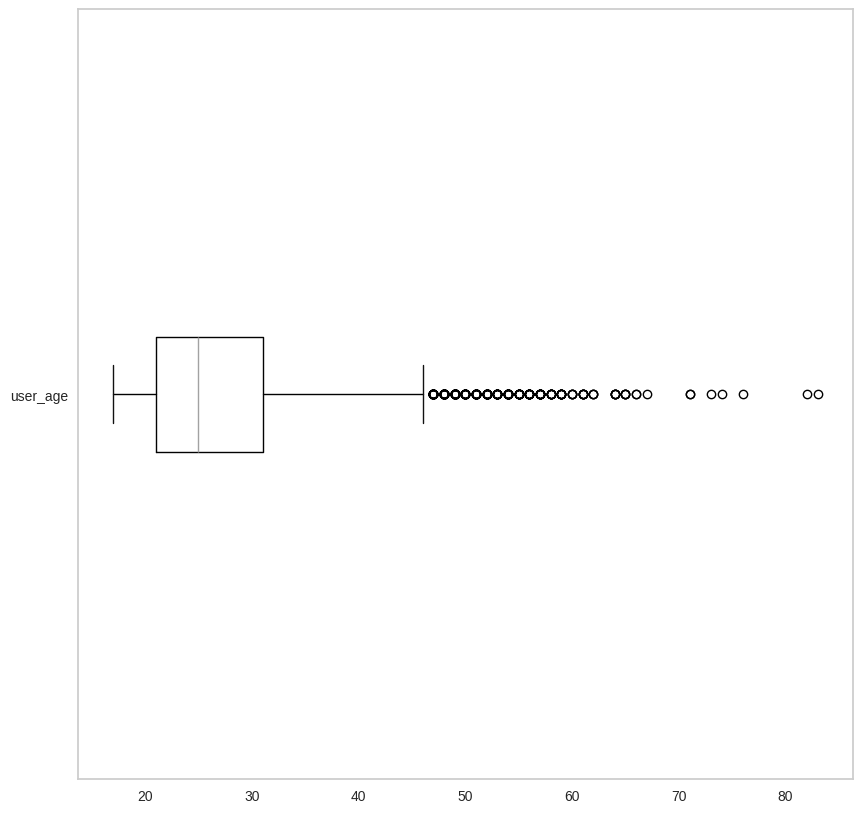

In [111]:
df_bond_sept_users.boxplot(column=['user_age'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)
plt.show()

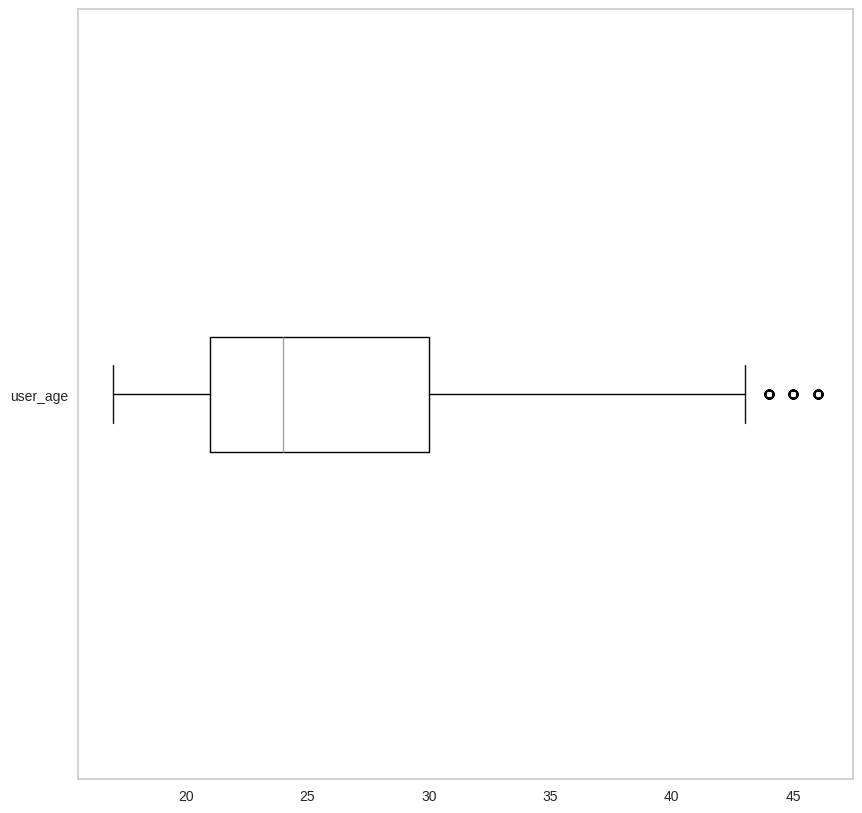

In [112]:
Q1 = df_bond_sept_users['user_age'].quantile(0.25)
Q3 = df_bond_sept_users['user_age'].quantile(0.75)

#Since outliers only present above upper fence, so we only remove data's outlier with upper fence
IQR = Q3-Q1
upper_fence = Q3 + 1.5*IQR

df_bond_sept_users = df_bond_sept_users[~(df_bond_sept_users['user_age']>upper_fence)]

df_bond_sept_users.boxplot(column=['user_age'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)
plt.show()

end of period sept

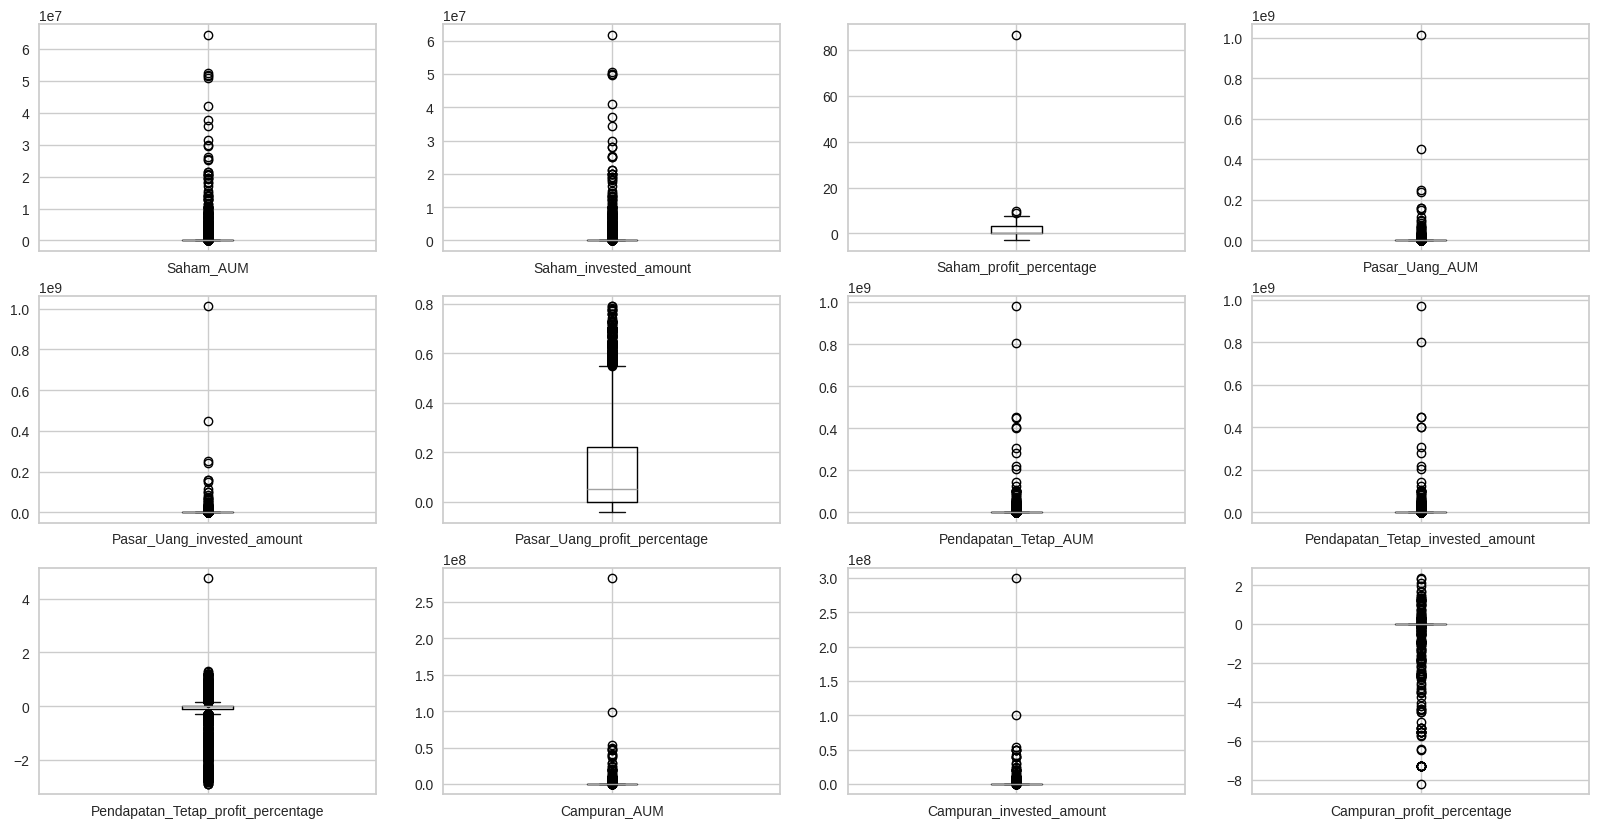

In [113]:
numerical = ['Saham_AUM','Saham_invested_amount','Saham_profit_percentage',
            'Pasar_Uang_AUM','Pasar_Uang_invested_amount','Pasar_Uang_profit_percentage',
            'Pendapatan_Tetap_AUM','Pendapatan_Tetap_invested_amount','Pendapatan_Tetap_profit_percentage',
            'Campuran_AUM','Campuran_invested_amount','Campuran_profit_percentage']

fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(20,10))
for i,el in enumerate(numerical):
    a = df_endperiod_sept.boxplot(el, ax=axes.flatten()[i],grid=True)
plt.show()

before we start to remove outliers using IQR formula. we need to know that the value **0** means no transaction, we need to exclude data with 0 values while calculating by replacing with NaN value

In [114]:
df_endperiod_sept = df_endperiod_sept.replace(0, np.nan, regex=True)

In [115]:
df_endperiod_sept.shape

(8277, 14)

In [116]:
df_endperiod_sept.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8277 entries, 58 to 355187
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   user_id                             8277 non-null   int64  
 1   date                                8277 non-null   object 
 2   Saham_AUM                           4114 non-null   float64
 3   Saham_invested_amount               4078 non-null   float64
 4   Saham_profit_percentage             4114 non-null   float64
 5   Pasar_Uang_AUM                      4946 non-null   float64
 6   Pasar_Uang_invested_amount          4946 non-null   float64
 7   Pasar_Uang_profit_percentage        4943 non-null   float64
 8   Pendapatan_Tetap_AUM                4157 non-null   float64
 9   Pendapatan_Tetap_invested_amount    4157 non-null   float64
 10  Pendapatan_Tetap_profit_percentage  4154 non-null   float64
 11  Campuran_AUM                        200 non-n

In [117]:
#remove outliers using IQR

Q1 = df_endperiod_sept[numerical].quantile(0.25)
Q3 = df_endperiod_sept[numerical].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)


Q1:
 Saham_AUM                               51358.000000
Saham_invested_amount                   50000.000000
Saham_profit_percentage                     2.715000
Pasar_Uang_AUM                          10033.000000
Pasar_Uang_invested_amount              10000.000000
Pasar_Uang_profit_percentage                0.090000
Pendapatan_Tetap_AUM                    49866.000000
Pendapatan_Tetap_invested_amount        50000.000000
Pendapatan_Tetap_profit_percentage         -0.242193
Campuran_AUM                           944533.000000
Campuran_invested_amount              1000000.000000
Campuran_profit_percentage                 -2.687652
Name: 0.25, dtype: float64

Q3:
 Saham_AUM                             3.350852e+05
Saham_invested_amount                 3.300000e+05
Saham_profit_percentage               4.200348e+00
Pasar_Uang_AUM                        2.013770e+05
Pasar_Uang_invested_amount            2.000000e+05
Pasar_Uang_profit_percentage          3.100000e-01
Pendapatan_Tetap_AUM

In [118]:
filter_min = df_endperiod_sept[numerical] < boxplot_min
filter_max = df_endperiod_sept[numerical] > boxplot_max

# Correctly apply the filter to the entire DataFrame
df_endperiod_sept_clean = df_endperiod_sept[~(filter_min | filter_max).any(axis=1)]

df_endperiod_sept_clean

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_profit_percentage,Campuran_AUM,Campuran_invested_amount,Campuran_profit_percentage
58,50701,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9943587.0,10000000.0,-0.56413
172,53759,2021-09-30,73179.0,70000.0,4.541429,10027.0,10000.0,0.270000,20109.0,20000.0,0.545000,NaN,NaN,NaN
276,61414,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,66145,2021-09-30,249327.0,240000.0,3.886250,29992.0,30000.0,-0.026667,129748.0,130000.0,-0.193846,NaN,NaN,NaN
400,67251,2021-09-30,584731.0,570000.0,2.584386,110195.0,110000.0,0.177273,419238.0,420000.0,-0.181429,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354826,4165020,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354885,4165132,2021-09-30,NaN,NaN,NaN,10001.0,10000.0,0.010000,NaN,NaN,NaN,NaN,NaN,NaN
355081,4165630,2021-09-30,41625.0,40000.0,4.062500,10001.0,10000.0,0.010000,49869.0,50000.0,-0.262000,NaN,NaN,NaN
355121,4165704,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9987.0,10000.0,-0.130000,NaN,NaN,NaN


In [119]:
df_endperiod_sept_clean.shape

(6432, 14)

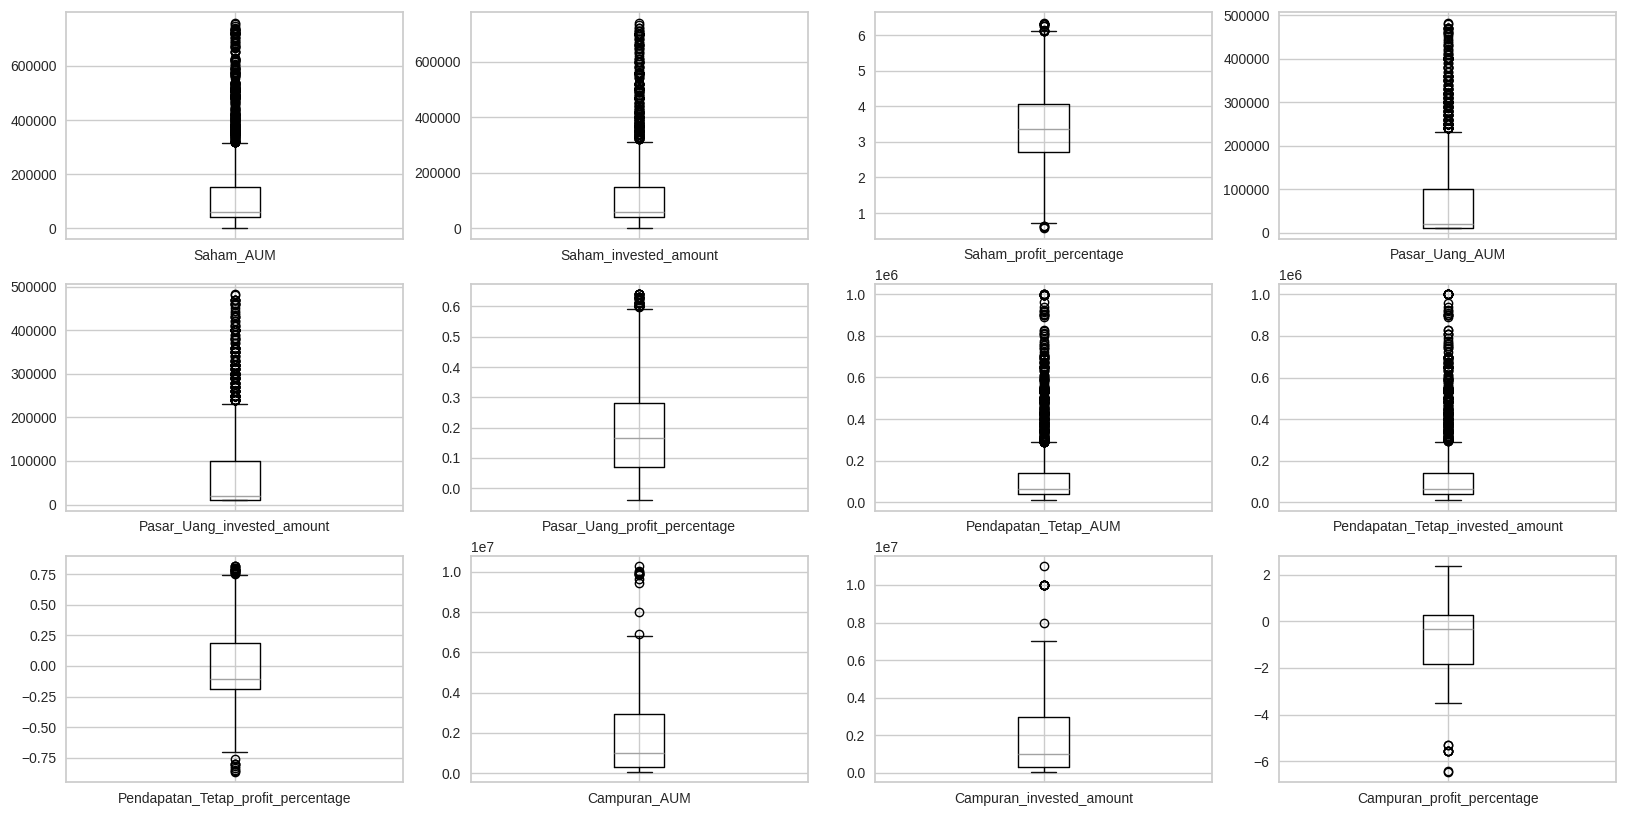

In [120]:
fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(20,10))
for i,el in enumerate(numerical):
    a = df_endperiod_sept_clean.boxplot(el, ax=axes.flatten()[i],grid=True)
plt.show()

In [121]:
#don't forget to fill NaN value with 0 again
df_endperiod_sept_clean.fillna(0,inplace=True)

<ipython-input-121-cf438d22adf2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_endperiod_sept_clean.fillna(0,inplace=True)


Outliers removed percentage:
(8277-7712)/8277*100 = 6.82%

**6.82% of outliers are removed** benerin lagi

end of period oct

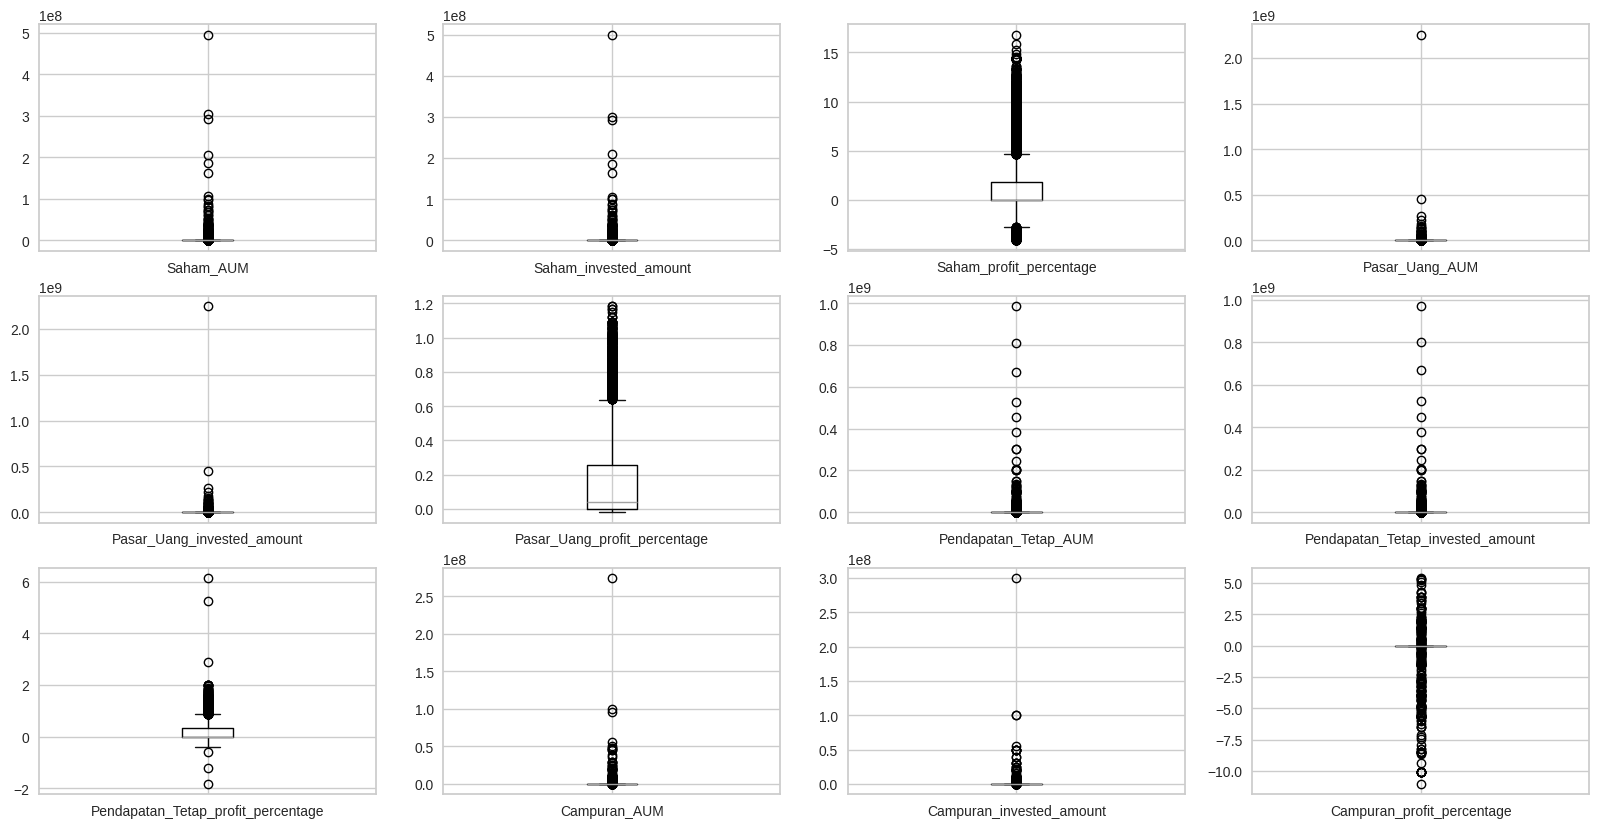

In [122]:
fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(20,10))
for i,el in enumerate(numerical):
    a = df_endperiod_oct.boxplot(el, ax=axes.flatten()[i],grid=True)
plt.show()

In [123]:
df_endperiod_oct = df_endperiod_oct.replace(0, np.nan, regex=True)

In [124]:
df_endperiod_oct.shape

(14712, 14)

In [125]:
#remove outliers using IQR

oct_Q1 = df_endperiod_oct[numerical].quantile(0.25)
oct_Q3 = df_endperiod_oct[numerical].quantile(0.75)

oct_IQR = oct_Q3 - oct_Q1
boxplot_min_oct = oct_Q1 - 1.5 * oct_IQR
boxplot_max_oct = oct_Q3 + 1.5 * oct_IQR
print('Q1:\n',oct_Q1)
print('\nQ3:\n',oct_Q3)
print('\nIQR:\n',oct_IQR)
print('\nMin:\n',boxplot_min_oct)
print('\nMax:\n',boxplot_max_oct)


Q1:
 Saham_AUM                              50868.750000
Saham_invested_amount                  50000.000000
Saham_profit_percentage                   -0.780000
Pasar_Uang_AUM                         10042.000000
Pasar_Uang_invested_amount             10000.000000
Pasar_Uang_profit_percentage               0.107500
Pendapatan_Tetap_AUM                   50150.000000
Pendapatan_Tetap_invested_amount       50000.000000
Pendapatan_Tetap_profit_percentage         0.165839
Campuran_AUM                          663268.000000
Campuran_invested_amount              650000.000000
Campuran_profit_percentage                -4.395922
Name: 0.25, dtype: float64

Q3:
 Saham_AUM                             4.961198e+05
Saham_invested_amount                 4.955518e+05
Saham_profit_percentage               6.747128e+00
Pasar_Uang_AUM                        2.103820e+05
Pasar_Uang_invested_amount            2.100000e+05
Pasar_Uang_profit_percentage          4.000000e-01
Pendapatan_Tetap_AUM            

In [126]:
filter_min_oct = df_endperiod_oct[numerical] < boxplot_min_oct
filter_max_oct = df_endperiod_oct[numerical] > boxplot_max_oct

# Correctly apply the filter to the entire DataFrame
df_endperiod_oct_clean = df_endperiod_oct[~(filter_min_oct | filter_max_oct).any(axis=1)]

df_endperiod_oct_clean

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_profit_percentage,Campuran_AUM,Campuran_invested_amount,Campuran_profit_percentage
17,43195,2021-10-29,280945.0,280000.0,0.337500,50127.0,50000.0,0.254,170702.0,170000.0,0.412941,NaN,NaN,NaN
79,50701,2021-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9637035.0,10000000.0,-3.62965
144,51883,2021-10-29,96927.0,90000.0,7.696667,20036.0,20000.0,0.180,90331.0,90000.0,0.367778,NaN,NaN,NaN
193,53759,2021-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,61414,2021-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401234,4457509,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,0.010,NaN,NaN,NaN,NaN,NaN,NaN
401235,4457532,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,0.010,NaN,NaN,NaN,NaN,NaN,NaN
401236,4457596,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,0.010,NaN,NaN,NaN,NaN,NaN,NaN
401237,4457622,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,0.010,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
df_endperiod_oct_clean.shape

(12255, 14)

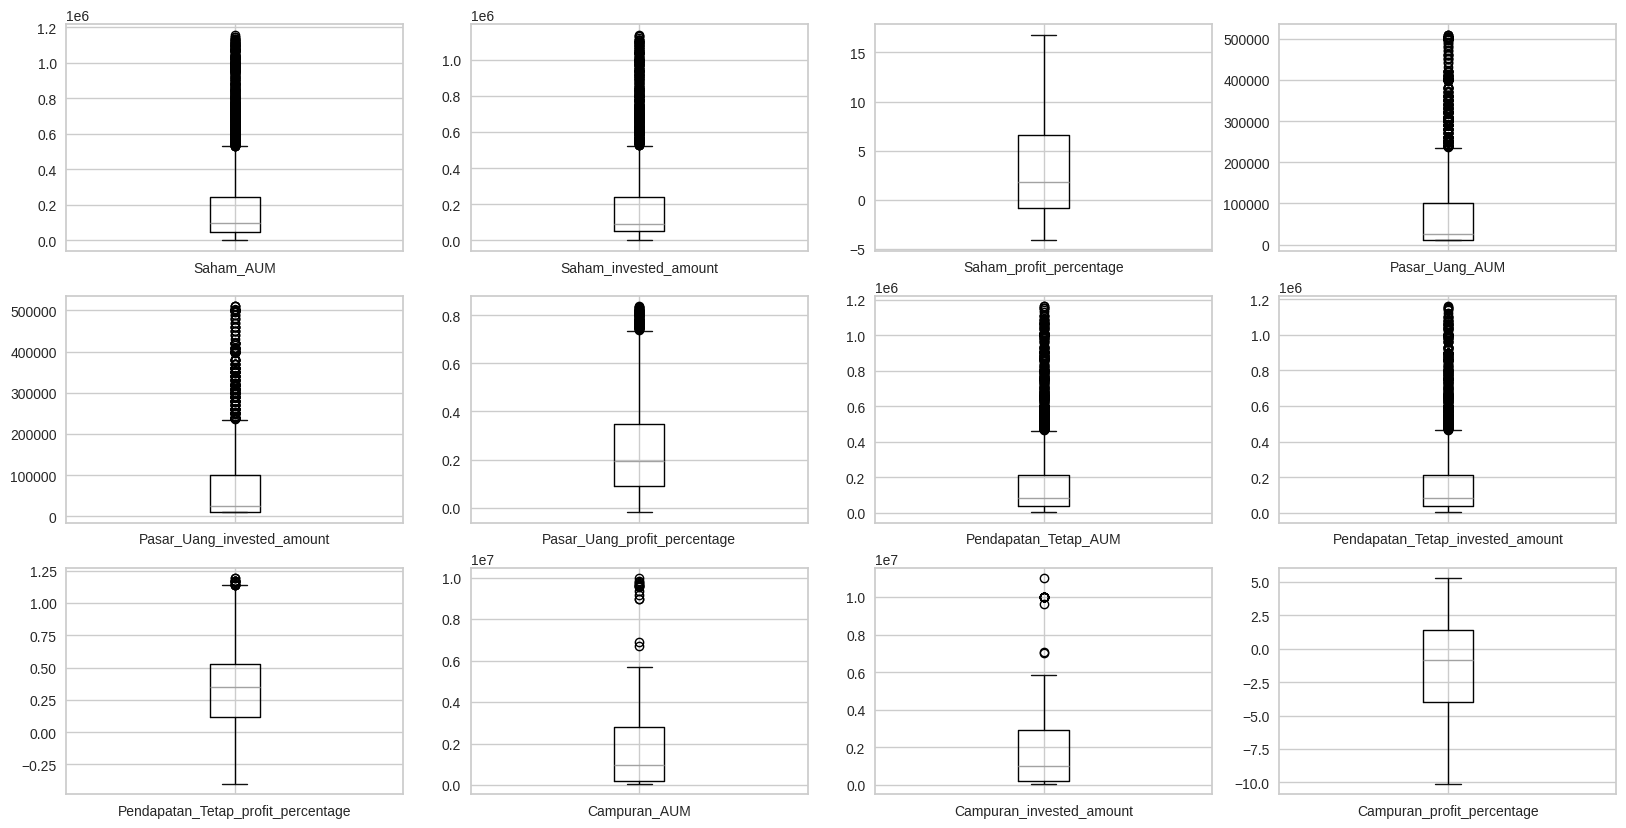

In [128]:
fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(20,10))
for i,el in enumerate(numerical):
    a = df_endperiod_oct_clean.boxplot(el, ax=axes.flatten()[i],grid=True)
plt.show()

In [129]:
#don't forget to fill NaN value with 0 again
df_endperiod_oct_clean.fillna(0,inplace=True)

<ipython-input-129-c6805fe15497>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_endperiod_oct_clean.fillna(0,inplace=True)


Outliers removed percentage:
(14712-13734)/14712*100 = 6.64%

**6.64% of outliers are removed**

#### Check data types

users data

In [130]:
df_users.dtypes

,0
user_id,int64
registration_import_datetime,object
user_gender,object
user_age,int64
user_occupation,object
user_income_range,object
referral_code_used,object
user_income_source,object
vintage_30sept,int64
vintage_29oct,int64


In [131]:
#since user_id is a unique identifier and not just a normal value number, we need to convert it to object
df_users['user_id'] = df_users['user_id'].astype('string')

<ipython-input-131-f211b0a378d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users['user_id'] = df_users['user_id'].astype('string')


In [132]:
df_bond_sept_users.dtypes

,0
user_id,int64
user_gender,object
user_age,int64
user_occupation,object
user_income_range,object
referral_code_used,object
vintage_30sept,int64
vintage_29oct,int64
flag_order_bond,int64
bond_units_ordered,int64


end of period sept

In [133]:
#since user_id is a unique identifier and not just a normal value number, we need to convert it to object
df_bond_sept_users['user_id'] = df_bond_sept_users['user_id'].astype('string')
df_bond_sept['user_id'] = df_bond_sept['user_id'].astype('string')

<ipython-input-133-7befb3d39c63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bond_sept_users['user_id'] = df_bond_sept_users['user_id'].astype('string')


In [134]:
df_endperiod_sept_clean.dtypes

,0
user_id,int64
date,object
Saham_AUM,float64
Saham_invested_amount,float64
Saham_profit_percentage,float64
Pasar_Uang_AUM,float64
Pasar_Uang_invested_amount,float64
Pasar_Uang_profit_percentage,float64
Pendapatan_Tetap_AUM,float64
Pendapatan_Tetap_invested_amount,float64


In [135]:
#since user_id is a unique identifier and not just a normal value number, we need to convert it to object
df_endperiod_sept_clean['user_id'] = df_endperiod_sept_clean['user_id'].astype('string')

<ipython-input-135-b96ba20f9f78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_endperiod_sept_clean['user_id'] = df_endperiod_sept_clean['user_id'].astype('string')


end of period oct

In [136]:
df_endperiod_oct_clean.dtypes

,0
user_id,int64
date,object
Saham_AUM,float64
Saham_invested_amount,float64
Saham_profit_percentage,float64
Pasar_Uang_AUM,float64
Pasar_Uang_invested_amount,float64
Pasar_Uang_profit_percentage,float64
Pendapatan_Tetap_AUM,float64
Pendapatan_Tetap_invested_amount,float64


In [137]:
#since user_id is a unique identifier and not just a normal value number, we need to convert it to object
df_endperiod_oct_clean['user_id'] = df_endperiod_oct_clean['user_id'].astype('string')

<ipython-input-137-5f0bbd74ca6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_endperiod_oct_clean['user_id'] = df_endperiod_oct_clean['user_id'].astype('string')


#### simplify categorical data by dissolving variable with small quantity to other variables

In [138]:
for i in df_bond_sept_users.columns:
  unique_data2 = df_bond_sept_users[i].value_counts()
  print(unique_data2,'\n')

user_id
3752000    1
3802513    1
2431071    1
2182692    1
3426536    1
          ..
4007564    1
3985692    1
3953388    1
4041938    1
4043937    1
Name: count, Length: 8107, dtype: Int64 

user_gender
Male      5109
Female    2998
Name: count, dtype: int64 

user_age
21    709
20    626
23    571
22    569
24    522
19    518
25    471
18    451
26    432
27    372
28    358
29    336
30    264
31    235
32    195
33    167
35    166
34    144
36    137
17    135
37    108
42     95
38     91
40     78
39     75
41     71
43     59
44     55
46     49
45     48
Name: count, dtype: int64 

user_occupation
Pelajar       4590
Swasta        1739
Others         921
IRT            392
Pengusaha      302
PNS             89
Guru            51
TNI/Polisi      23
Name: count, dtype: int64 

user_income_range
< 10 Juta                   3543
Rp 10 Juta - 50 Juta        2658
> Rp 50 Juta - 100 Juta     1287
> Rp 100 Juta - 500 Juta     563
> Rp 500 Juta - 1 Miliar      42
> Rp 1 Miliar        

In [139]:
#simplify categorical value

df_bond_sept_users.loc[df_bond_sept_users['user_occupation'] == 'PNS', 'user_occupation'] = 'Others'
df_bond_sept_users.loc[df_bond_sept_users['user_occupation'] == 'Guru', 'user_occupation'] = 'Others'
df_bond_sept_users.loc[df_bond_sept_users['user_occupation'] == 'TNI/Polisi', 'user_occupation'] = 'Others'
df_bond_sept_users.loc[df_bond_sept_users['user_occupation'] == 'Pensiunan', 'user_occupation'] = 'Others'
df_bond_sept_users.loc[df_bond_sept_users['user_occupation'] == 'IRT', 'user_occupation'] = 'Others'
df_bond_sept_users.loc[df_bond_sept_users['user_occupation'] == 'Pengusaha', 'user_occupation'] = 'Others'


df_bond_sept_users.loc[df_bond_sept_users['user_income_range'] == '> Rp 100 Juta - 500 Juta', 'user_income_range'] = '> Rp 100 Juta'
df_bond_sept_users.loc[df_bond_sept_users['user_income_range'] == '> Rp 500 Juta - 1 Miliar', 'user_income_range'] = '> Rp 100 Juta'
df_bond_sept_users.loc[df_bond_sept_users['user_income_range'] == '> Rp 1 Miliar', 'user_income_range'] = '> Rp 100 Juta'

df_bond_sept_users

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,vintage_30sept,vintage_29oct,flag_order_bond,bond_units_ordered
279,2431071,Female,17,Pelajar,Rp 10 Juta - 50 Juta,not used,27,56,0,0
280,2182692,Male,17,Pelajar,< 10 Juta,used referral,23,52,1,95
281,3426536,Female,17,Pelajar,< 10 Juta,not used,9,38,0,0
282,336770,Male,17,Pelajar,Rp 10 Juta - 50 Juta,not used,11,40,1,17
283,3750521,Male,17,Pelajar,< 10 Juta,not used,8,37,1,43
...,...,...,...,...,...,...,...,...,...,...
8381,3791358,Female,46,Others,> Rp 100 Juta,not used,53,82,1,21
8382,3662093,Male,46,Others,> Rp 100 Juta,not used,37,66,1,100
8383,3736233,Male,46,Swasta,< 10 Juta,not used,59,88,0,0
8384,2478889,Female,46,Swasta,< 10 Juta,not used,49,78,1,17


#### String manipulation

users data

In [140]:
#referal code used needs to be manipulated to 'no' and 'yes'
df_bond_sept_users['referral_code_used'] = df_bond_sept_users['referral_code_used'].replace('used referral','yes')

df_bond_sept_users['referral_code_used'].value_counts()

<ipython-input-140-d8c837db94cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bond_sept_users['referral_code_used'] = df_bond_sept_users['referral_code_used'].replace('used referral','yes')


,count
referral_code_used,
not used,5223
yes,2884


# Prepare data to fit to the logistic regression model

## merge end of period september data

In [141]:
merge_sept = df_endperiod_sept_clean.copy()
merge_sept = merge_sept.merge(df_bond_sept_users, how='inner',left_on='user_id', right_on='user_id')
merge_sept.set_index('user_id')

,date,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_profit_percentage,...,Campuran_profit_percentage,user_gender,user_age,user_occupation,user_income_range,referral_code_used,vintage_30sept,vintage_29oct,flag_order_bond,bond_units_ordered
user_id,,,,,,,,,,,,,,,,,,,,,
50701,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,-0.56413,Female,28,Others,Rp 10 Juta - 50 Juta,not used,37,66,1,34
53759,2021-09-30,73179.0,70000.0,4.541429,10027.0,10000.0,0.270000,20109.0,20000.0,0.545000,...,0.00000,Male,29,Swasta,< 10 Juta,not used,42,71,0,0
61414,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.00000,Male,26,Pelajar,< 10 Juta,not used,53,82,0,0
66145,2021-09-30,249327.0,240000.0,3.886250,29992.0,30000.0,-0.026667,129748.0,130000.0,-0.193846,...,0.00000,Female,33,Swasta,> Rp 100 Juta,not used,28,57,0,0
67251,2021-09-30,584731.0,570000.0,2.584386,110195.0,110000.0,0.177273,419238.0,420000.0,-0.181429,...,0.00000,Female,29,Others,Rp 10 Juta - 50 Juta,not used,29,58,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165020,2021-09-30,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.00000,Male,24,Others,< 10 Juta,yes,2,31,0,0
4165132,2021-09-30,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,...,0.00000,Male,18,Pelajar,< 10 Juta,yes,2,31,0,0
4165630,2021-09-30,41625.0,40000.0,4.062500,10001.0,10000.0,0.010000,49869.0,50000.0,-0.262000,...,0.00000,Female,28,Swasta,Rp 10 Juta - 50 Juta,not used,2,31,1,55


In [142]:
merge_sept.columns

Index(['user_id', 'date', 'Saham_AUM', 'Saham_invested_amount',
       'Saham_profit_percentage', 'Pasar_Uang_AUM',
       'Pasar_Uang_invested_amount', 'Pasar_Uang_profit_percentage',
       'Pendapatan_Tetap_AUM', 'Pendapatan_Tetap_invested_amount',
       'Pendapatan_Tetap_profit_percentage', 'Campuran_AUM',
       'Campuran_invested_amount', 'Campuran_profit_percentage', 'user_gender',
       'user_age', 'user_occupation', 'user_income_range',
       'referral_code_used', 'vintage_30sept', 'vintage_29oct',
       'flag_order_bond', 'bond_units_ordered'],
      dtype='object')

In [143]:
#deleting columns thats not gonna be used (user id, date, vintage_29oct)
df_data_used = merge_sept.drop(['date','vintage_29oct'],axis=1)

#replacing columns name from 'vintage_30sept' to 'vintage' only
df_data_used.rename(columns={'vintage_30sept': 'vintage'}, inplace=True)
df_data_used.columns

Index(['user_id', 'Saham_AUM', 'Saham_invested_amount',
       'Saham_profit_percentage', 'Pasar_Uang_AUM',
       'Pasar_Uang_invested_amount', 'Pasar_Uang_profit_percentage',
       'Pendapatan_Tetap_AUM', 'Pendapatan_Tetap_invested_amount',
       'Pendapatan_Tetap_profit_percentage', 'Campuran_AUM',
       'Campuran_invested_amount', 'Campuran_profit_percentage', 'user_gender',
       'user_age', 'user_occupation', 'user_income_range',
       'referral_code_used', 'vintage', 'flag_order_bond',
       'bond_units_ordered'],
      dtype='object')

## Select the data thats gonna be used to train

keep in mind that the data selected must be available in the oct dataset aswell

In [144]:
numerical = ['Saham_AUM', 'Saham_invested_amount', 'Saham_profit_percentage',
       'Pasar_Uang_AUM', 'Pasar_Uang_invested_amount',
       'Pasar_Uang_profit_percentage', 'Pendapatan_Tetap_AUM',
       'Pendapatan_Tetap_invested_amount',
       'Pendapatan_Tetap_profit_percentage', 'Campuran_AUM',
       'Campuran_invested_amount', 'Campuran_profit_percentage','flag_order_bond', 'bond_units_ordered'
       ,'vintage','user_age']

categorical = ['user_gender', 'user_occupation', 'user_income_range',
       'referral_code_used']

all_columns = numerical + categorical

df_data_used = df_data_used[all_columns]
df_data_used

,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_profit_percentage,Campuran_AUM,Campuran_invested_amount,Campuran_profit_percentage,flag_order_bond,bond_units_ordered,vintage,user_age,user_gender,user_occupation,user_income_range,referral_code_used
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,9943587.0,10000000.0,-0.56413,1,34,37,28,Female,Others,Rp 10 Juta - 50 Juta,not used
1,73179.0,70000.0,4.541429,10027.0,10000.0,0.270000,20109.0,20000.0,0.545000,0.0,0.0,0.00000,0,0,42,29,Male,Swasta,< 10 Juta,not used
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0,0,53,26,Male,Pelajar,< 10 Juta,not used
3,249327.0,240000.0,3.886250,29992.0,30000.0,-0.026667,129748.0,130000.0,-0.193846,0.0,0.0,0.00000,0,0,28,33,Female,Swasta,> Rp 100 Juta,not used
4,584731.0,570000.0,2.584386,110195.0,110000.0,0.177273,419238.0,420000.0,-0.181429,0.0,0.0,0.00000,1,20,29,29,Female,Others,Rp 10 Juta - 50 Juta,not used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6210,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0,0,2,24,Male,Others,< 10 Juta,yes
6211,0.0,0.0,0.000000,10001.0,10000.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.00000,0,0,2,18,Male,Pelajar,< 10 Juta,yes
6212,41625.0,40000.0,4.062500,10001.0,10000.0,0.010000,49869.0,50000.0,-0.262000,0.0,0.0,0.00000,1,55,2,28,Female,Swasta,Rp 10 Juta - 50 Juta,not used
6213,0.0,0.0,0.000000,0.0,0.0,0.000000,9987.0,10000.0,-0.130000,0.0,0.0,0.00000,0,0,2,25,Male,Swasta,Rp 10 Juta - 50 Juta,yes


## Define numerical and categorical column and give the right treatment

In [145]:
df_cluster = df_data_used.copy()

#Normalize numerical data using minmax scaler
scaler = MinMaxScaler()
df_cluster[numerical] = scaler.fit_transform(df_cluster[numerical])

#create dummy for categorical data
df_cluster = pd.get_dummies(df_cluster, columns=categorical)

df_cluster

,Saham_AUM,Saham_invested_amount,Saham_profit_percentage,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_profit_percentage,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_profit_percentage,Campuran_AUM,...,user_gender_Male,user_occupation_Others,user_occupation_Pelajar,user_occupation_Swasta,user_income_range_< 10 Juta,user_income_range_> Rp 100 Juta,user_income_range_> Rp 50 Juta - 100 Juta,user_income_range_Rp 10 Juta - 50 Juta,referral_code_used_not used,referral_code_used_yes
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.00,0.514839,0.966389,...,False,True,False,False,False,False,False,True,True,False
1,0.096252,0.094595,0.714904,0.020730,0.020737,0.455882,0.020134,0.02,0.838478,0.000000,...,True,False,False,True,True,False,False,False,True,False
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.00,0.514839,0.000000,...,True,False,True,False,True,False,False,False,True,False
3,0.327939,0.324324,0.611767,0.062005,0.062212,0.019608,0.129911,0.13,0.399727,0.000000,...,False,False,False,True,False,True,False,False,True,False
4,0.769095,0.770270,0.406830,0.227815,0.228109,0.319519,0.419765,0.42,0.407101,0.000000,...,False,True,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6210,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.00,0.514839,0.000000,...,True,True,False,False,True,False,False,False,False,True
6211,0.000000,0.000000,0.000000,0.020676,0.020737,0.073529,0.000000,0.00,0.514839,0.000000,...,True,False,True,False,True,False,False,False,False,True
6212,0.054749,0.054054,0.639512,0.020676,0.020737,0.073529,0.049932,0.05,0.359255,0.000000,...,False,False,False,True,False,False,False,True,True,False
6213,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.010000,0.01,0.437641,0.000000,...,True,False,False,True,False,False,False,True,False,True


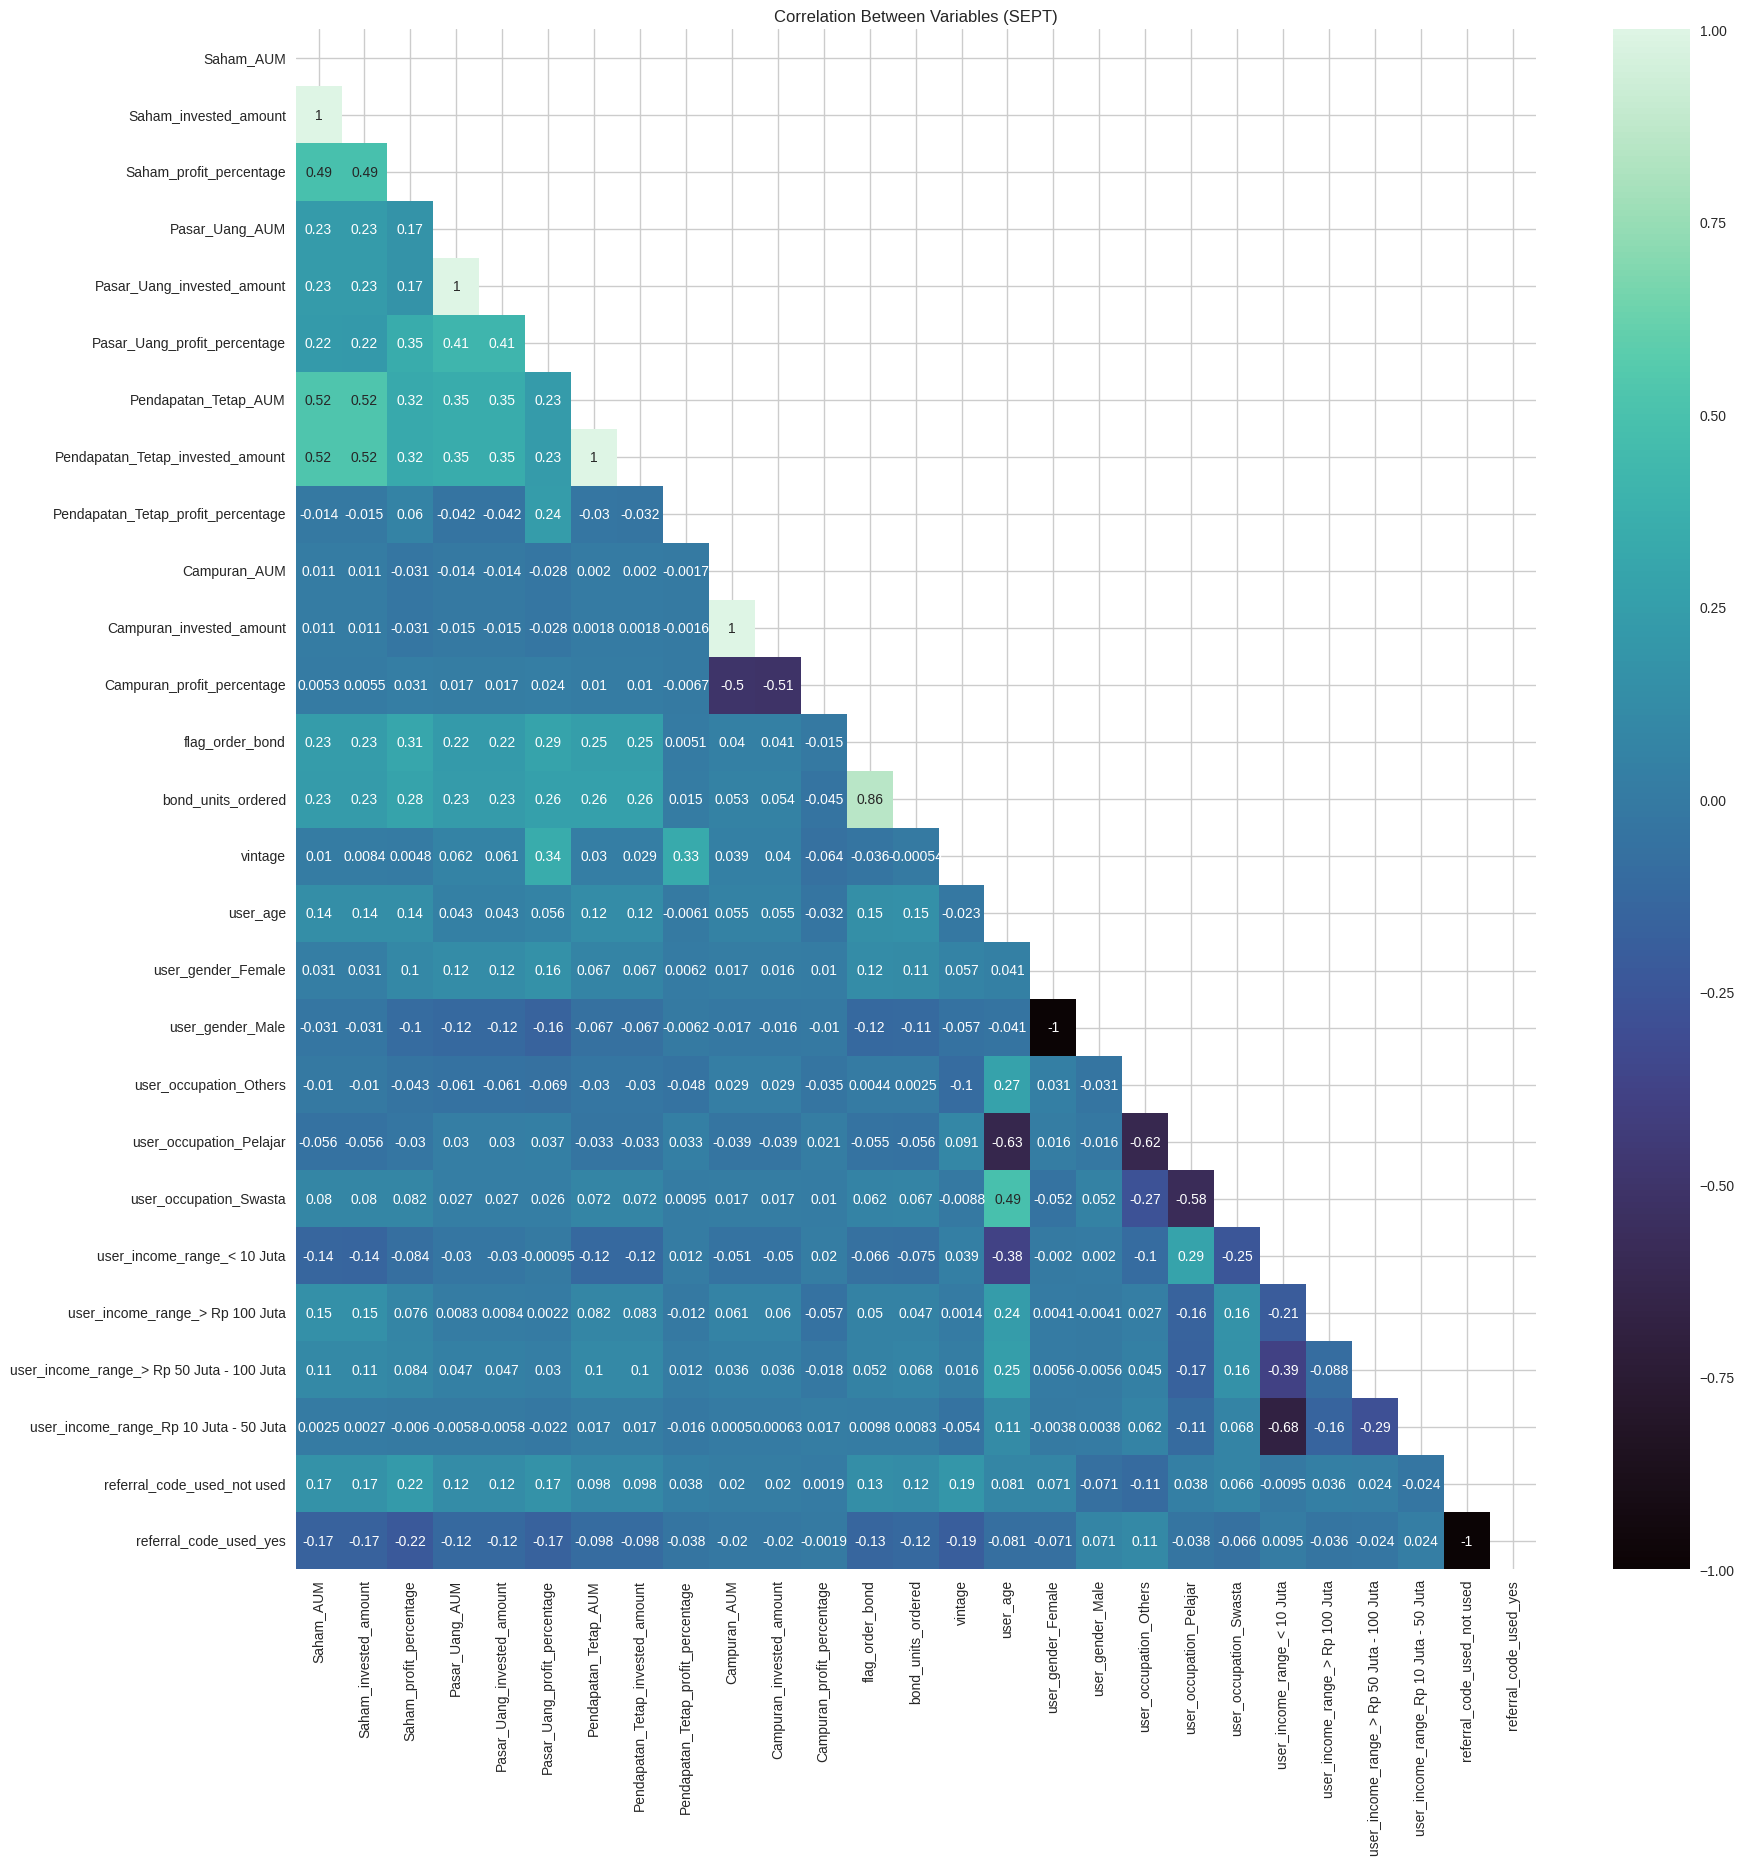

In [146]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variables (SEPT)')

mask = np.triu(np.ones_like(
    df_cluster.corr(), dtype=bool))
sns.heatmap(df_cluster.corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":10})

plt.show()

In [147]:
 df_cluster.corr()['flag_order_bond'].sort_values()

,flag_order_bond
referral_code_used_yes,-0.134598
user_gender_Male,-0.118860
user_income_range_< 10 Juta,-0.066114
user_occupation_Pelajar,-0.054539
vintage,-0.036177
Campuran_profit_percentage,-0.015352
user_occupation_Others,0.004395
Pendapatan_Tetap_profit_percentage,0.005055
user_income_range_Rp 10 Juta - 50 Juta,0.009788
Campuran_AUM,0.040477


In [148]:
# here are variables that have high correlation with flag order bond
# only use colum from transaction data

to_keep = df_cluster[['Saham_profit_percentage','Pasar_Uang_profit_percentage','Pendapatan_Tetap_invested_amount',
                      'Pendapatan_Tetap_AUM','Saham_AUM','Saham_invested_amount','Pasar_Uang_AUM','Pasar_Uang_invested_amount']]
to_keep

,Saham_profit_percentage,Pasar_Uang_profit_percentage,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_AUM,Saham_AUM,Saham_invested_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount
0,0.000000,0.058824,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.714904,0.455882,0.02,0.020134,0.096252,0.094595,0.020730,0.020737
2,0.000000,0.058824,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.611767,0.019608,0.13,0.129911,0.327939,0.324324,0.062005,0.062212
4,0.406830,0.319519,0.42,0.419765,0.769095,0.770270,0.227815,0.228109
...,...,...,...,...,...,...,...,...
6210,0.000000,0.058824,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
6211,0.000000,0.073529,0.00,0.000000,0.000000,0.000000,0.020676,0.020737
6212,0.639512,0.073529,0.05,0.049932,0.054749,0.054054,0.020676,0.020737
6213,0.000000,0.058824,0.01,0.010000,0.000000,0.000000,0.000000,0.000000


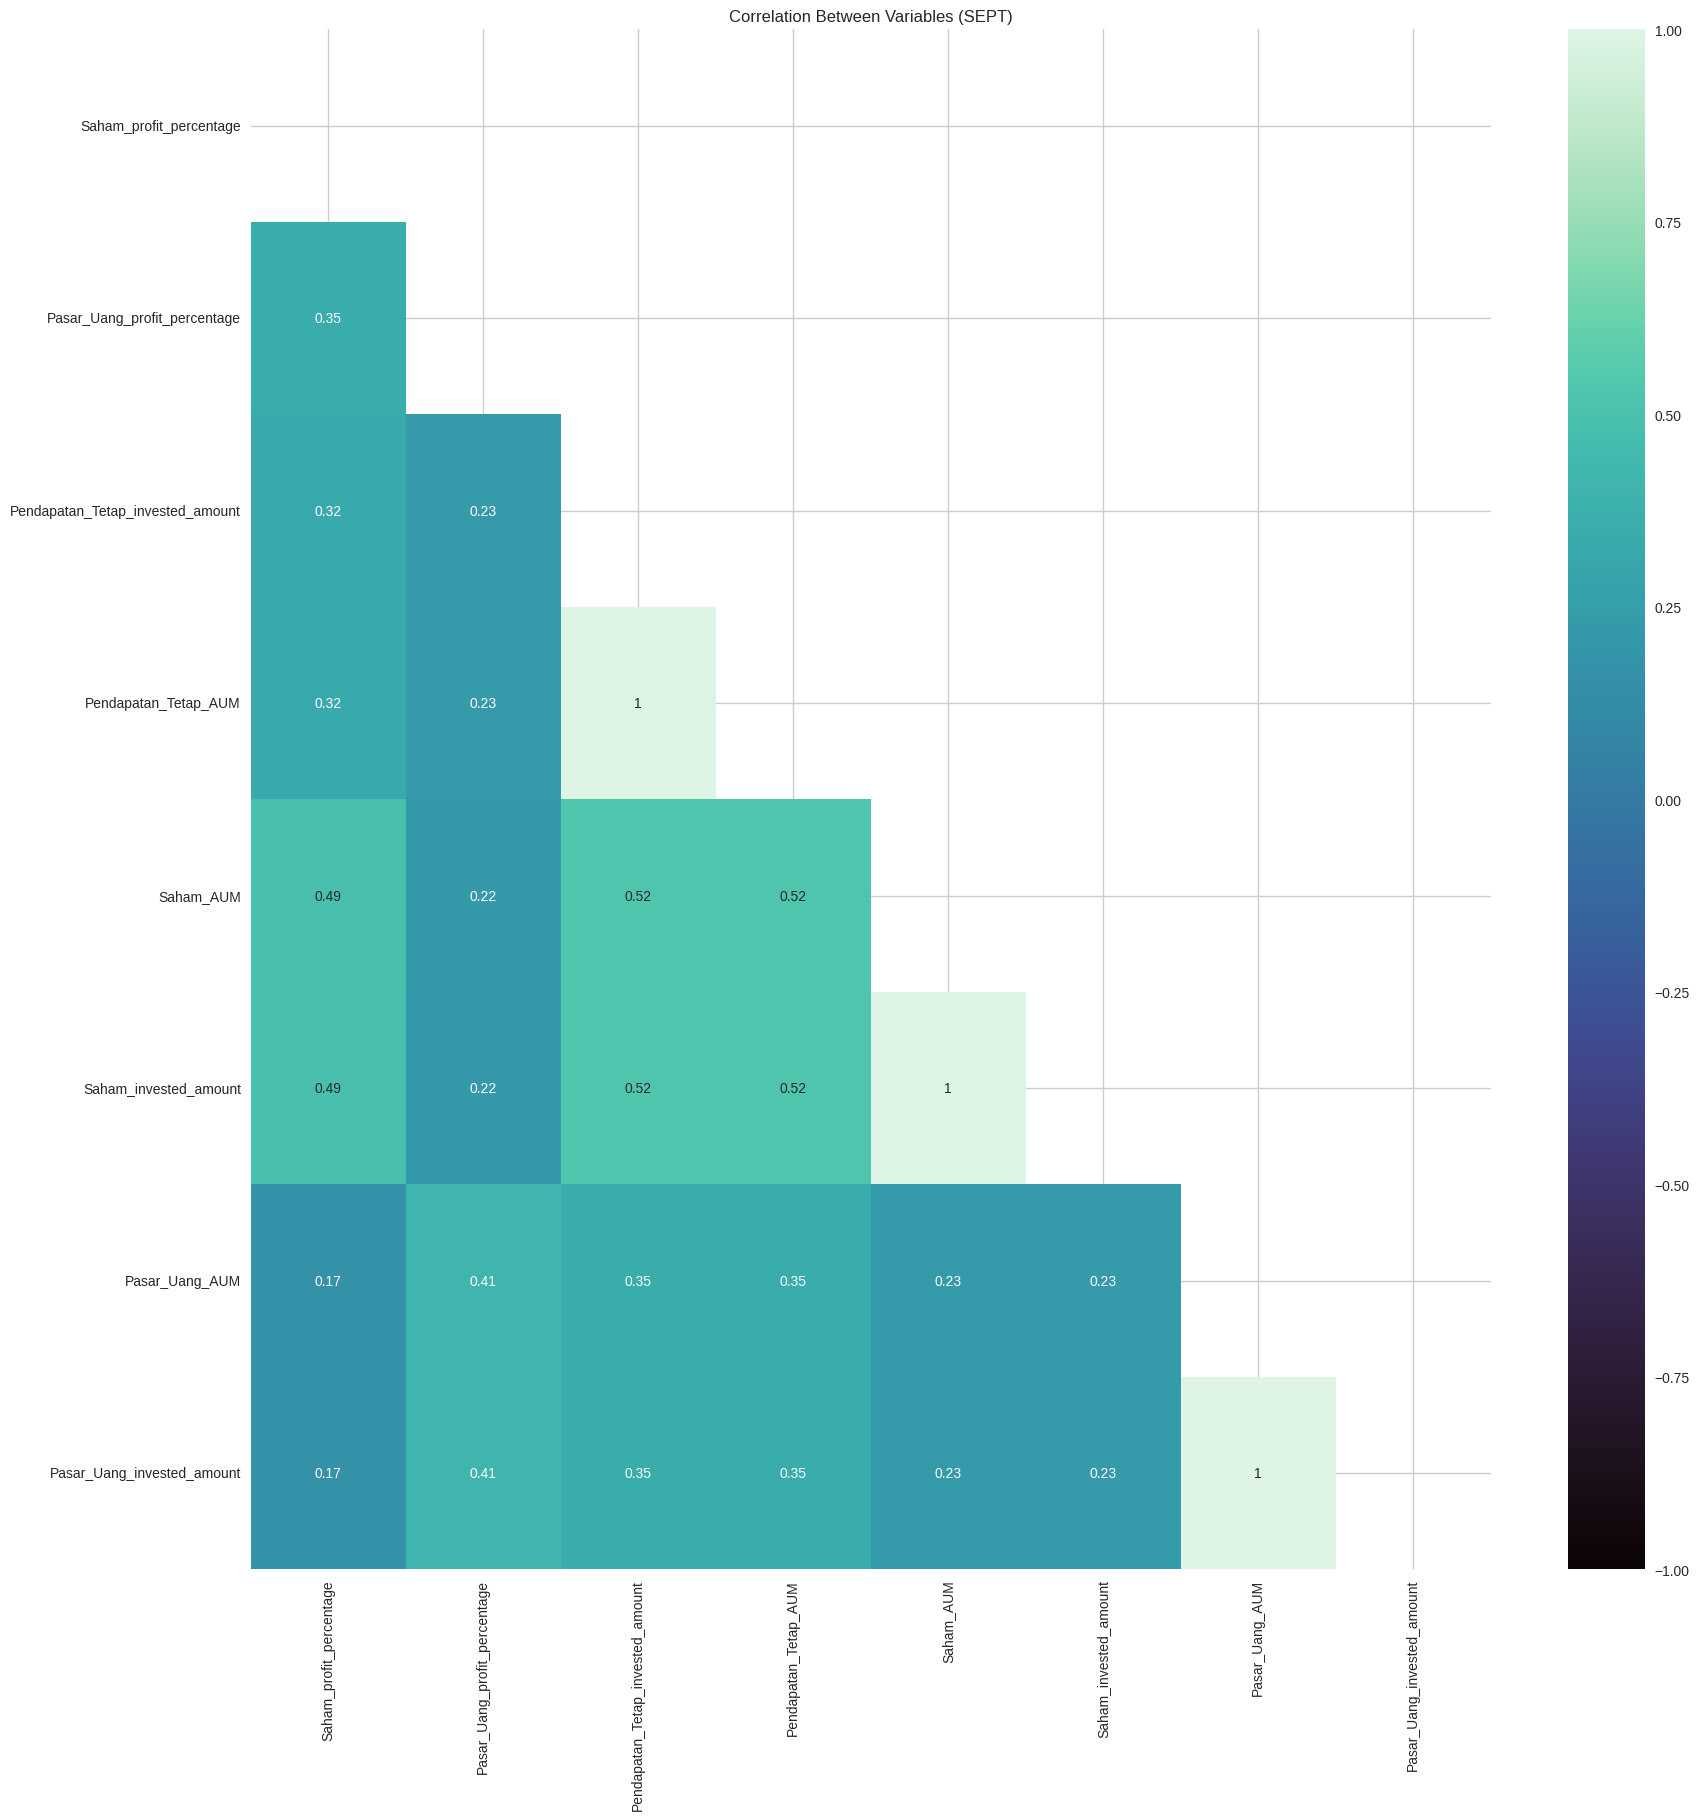

In [149]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variables (SEPT)')

mask = np.triu(np.ones_like(
    to_keep.corr(), dtype=bool))
sns.heatmap(to_keep.corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":10})

plt.show()

At this point, we need to choose which variables we want to include to our model.

The rule is: choose variables that are low-correlated to other variables

This means choose the threshold (e.g. if correlation < 0.7) and remove any variables that has any correlation greater than 0.7

In [150]:
# Create correlation matrix
corr_matrix = to_keep.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.7, and add into to_drop list
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

['Pendapatan_Tetap_AUM', 'Saham_invested_amount', 'Pasar_Uang_invested_amount']

# Logistic Regression

In [151]:
# Separate Churn from other variables
to_keep_vars = list(set(to_keep) - set(to_drop))
to_keep_vars

['Pasar_Uang_AUM',
 'Saham_AUM',
 'Pendapatan_Tetap_invested_amount',
 'Saham_profit_percentage',
 'Pasar_Uang_profit_percentage']

In [152]:
# Define the whole data
x = df_cluster[to_keep_vars]
y = df_cluster[['flag_order_bond']]

In [153]:
x

,Pasar_Uang_AUM,Saham_AUM,Pendapatan_Tetap_invested_amount,Saham_profit_percentage,Pasar_Uang_profit_percentage
0,0.000000,0.000000,0.00,0.000000,0.058824
1,0.020730,0.096252,0.02,0.714904,0.455882
2,0.000000,0.000000,0.00,0.000000,0.058824
3,0.062005,0.327939,0.13,0.611767,0.019608
4,0.227815,0.769095,0.42,0.406830,0.319519
...,...,...,...,...,...
6210,0.000000,0.000000,0.00,0.000000,0.058824
6211,0.020676,0.000000,0.00,0.000000,0.073529
6212,0.020676,0.054749,0.05,0.639512,0.073529
6213,0.000000,0.000000,0.01,0.000000,0.058824


In [154]:
# Fit logistic regression model to the training data
model = LogisticRegression(class_weight='balanced',max_iter=500)
model.fit(x, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=500)

In [155]:
# Accuracy dr prediksi model dengan data training
model.score(x, y)

0.6909090909090909

# Confusion Matrix

In [156]:
# confusion_matrix(churn actual, churn prediksi)
confusion_matrix(y, model.predict(x))

array([[2831, 1240],
       [ 681, 1463]])

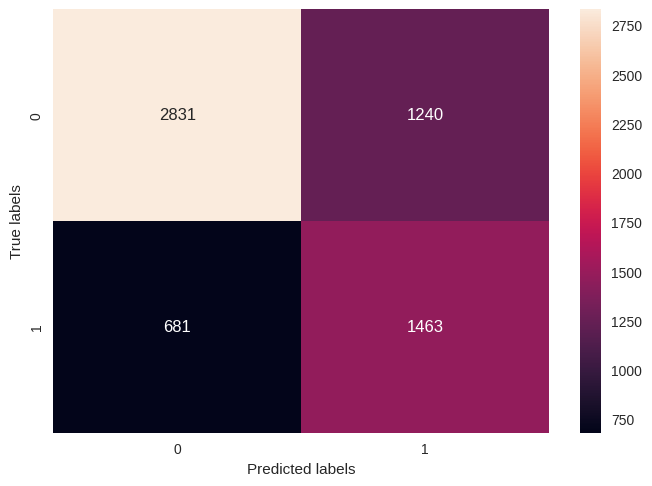

In [157]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y, model.predict(x)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');

In [158]:
from sklearn.metrics import classification_report
print(classification_report(y, model.predict(x), target_names=['Not Buy','Buy']))

              precision    recall  f1-score   support

     Not Buy       0.81      0.70      0.75      4071
         Buy       0.54      0.68      0.60      2144

    accuracy                           0.69      6215
   macro avg       0.67      0.69      0.68      6215
weighted avg       0.71      0.69      0.70      6215



## Check model on the test data

In [159]:
oct_final = df_endperiod_oct_clean[to_keep_vars]

In [160]:
oct_final

,Pasar_Uang_AUM,Saham_AUM,Pendapatan_Tetap_invested_amount,Saham_profit_percentage,Pasar_Uang_profit_percentage
17,50127.0,280945.0,170000.0,0.337500,0.254
79,0.0,0.0,0.0,0.000000,0.000
144,20036.0,96927.0,90000.0,7.696667,0.180
193,0.0,0.0,0.0,0.000000,0.000
297,0.0,0.0,0.0,0.000000,0.000
...,...,...,...,...,...
401234,10001.0,0.0,0.0,0.000000,0.010
401235,10001.0,0.0,0.0,0.000000,0.010
401236,10001.0,0.0,0.0,0.000000,0.010
401237,10001.0,0.0,0.0,0.000000,0.010


In [161]:
#Normalize numerical data using minmax scaler
scaler = MinMaxScaler()

oct_final[:] = scaler.fit_transform(oct_final[:])
oct_final


<ipython-input-161-c571a87613c2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oct_final[:] = scaler.fit_transform(oct_final[:])


,Pasar_Uang_AUM,Saham_AUM,Pendapatan_Tetap_invested_amount,Saham_profit_percentage,Pasar_Uang_profit_percentage
17,0.098192,0.242285,0.146552,0.213210,0.318777
79,0.000000,0.000000,0.000000,0.197090,0.022238
144,0.039248,0.083589,0.077586,0.564712,0.232384
193,0.000000,0.000000,0.000000,0.197090,0.022238
297,0.000000,0.000000,0.000000,0.197090,0.022238
...,...,...,...,...,...
401234,0.019591,0.000000,0.000000,0.197090,0.033912
401235,0.019591,0.000000,0.000000,0.197090,0.033912
401236,0.019591,0.000000,0.000000,0.197090,0.033912
401237,0.019591,0.000000,0.000000,0.197090,0.033912


Suppose we want to get a campaign to top 30% of users with highest probability to buy govt bond, with goal to save marketing money to selected customers only

We can first predict probability for all users, and get the top 30% users:

In [162]:
# Apply the model to the new data
oct_final['predicted_probability'] = model.predict_proba(oct_final)[:,1]

<ipython-input-162-d4fe0ee6b998>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oct_final['predicted_probability'] = model.predict_proba(oct_final)[:,1]


In [163]:
oct_final

,Pasar_Uang_AUM,Saham_AUM,Pendapatan_Tetap_invested_amount,Saham_profit_percentage,Pasar_Uang_profit_percentage,predicted_probability
17,0.098192,0.242285,0.146552,0.213210,0.318777,0.595412
79,0.000000,0.000000,0.000000,0.197090,0.022238,0.324783
144,0.039248,0.083589,0.077586,0.564712,0.232384,0.617046
193,0.000000,0.000000,0.000000,0.197090,0.022238,0.324783
297,0.000000,0.000000,0.000000,0.197090,0.022238,0.324783
...,...,...,...,...,...,...
401234,0.019591,0.000000,0.000000,0.197090,0.033912,0.335800
401235,0.019591,0.000000,0.000000,0.197090,0.033912,0.335800
401236,0.019591,0.000000,0.000000,0.197090,0.033912,0.335800
401237,0.019591,0.000000,0.000000,0.197090,0.033912,0.335800


In [164]:
oct_final['predicted_probability'].quantile(0.7)

np.float64(0.528536210710716)

In [165]:
#get top 30%
percent30 = oct_final['predicted_probability'].quantile(0.7)

# Get top 30% customers
leads = oct_final[oct_final['predicted_probability'] > percent30]

leads

,Pasar_Uang_AUM,Saham_AUM,Pendapatan_Tetap_invested_amount,Saham_profit_percentage,Pasar_Uang_profit_percentage,predicted_probability
17,0.098192,0.242285,0.146552,0.213210,0.318777,0.595412
144,0.039248,0.083589,0.077586,0.564712,0.232384,0.617046
315,0.196459,0.320163,0.500000,0.213213,0.363141,0.800360
332,0.058931,0.506489,0.103448,0.096037,0.349131,0.559394
381,0.058872,0.311281,0.133621,0.491399,0.232384,0.650800
...,...,...,...,...,...,...
401196,0.000000,0.000000,0.431034,0.197090,0.022238,0.541905
401197,0.274275,0.206078,0.189655,0.176412,0.036414,0.542900
401205,0.979577,0.000000,0.000000,0.197090,0.039049,0.683365
401214,0.587746,0.000000,0.000000,0.197090,0.038972,0.544982


## Hasil benefit-cost analysis

I consider users with a probability higher than 0.75 aree most likely to buy our new product. Therefore, I classified them as 'lead_to_customer.

In [166]:
lead_to_customer = oct_final[oct_final['predicted_probability'] >= 0.76]

lead_to_customer.sort_values('predicted_probability')

# 1141 is the expected number of leads that will convert to customer (I hope so)

,Pasar_Uang_AUM,Saham_AUM,Pendapatan_Tetap_invested_amount,Saham_profit_percentage,Pasar_Uang_profit_percentage,predicted_probability
228944,0.039342,0.066301,0.094828,0.666540,0.512578,0.760211
295303,0.255576,0.102032,0.068966,0.558011,0.445224,0.760275
217251,0.019671,0.096347,0.034483,0.756882,0.512578,0.760559
263439,0.039424,0.063621,0.051724,0.454469,0.757748,0.760664
104942,0.141358,0.487732,0.000000,0.270459,0.776132,0.760797
...,...,...,...,...,...,...
15026,0.492445,0.987632,0.896552,0.348652,0.672289,0.977019
12588,0.571734,0.852671,0.681034,0.553896,0.774657,0.979227
131456,0.393890,0.706338,0.913793,0.707279,0.652675,0.982485
118289,0.790036,0.433669,0.685414,0.424635,0.988909,0.984475


In [167]:
total = len(df_endperiod_oct)
print('Target Campaign','\n')
print('total client :',total,'\n')

# client
jmlh = 3674
jmlh2 = len(lead_to_customer)
print('Leads :',jmlh,'\n')
print('expected lead to customer :',jmlh2,'\n')


#Mean bond bought per user
bond = df_data_used.replace(0,np.nan,regex=True)
bond_buy_assumption = bond['bond_units_ordered'].mean()
print('Asumsi rata-rata unit bond yang dibeli :',bond_buy_assumption)

#probability user buy bond product
user_buy_assumption = leads['predicted_probability'].mean()
print('Asumsi rata-rata Rata-rata probability untuk membeli bond :',user_buy_assumption)


Target Campaign 

total client : 14712 

Leads : 3674 

expected lead to customer : 1141 

Asumsi rata-rata unit bond yang dibeli : 42.02285447761194
Asumsi rata-rata Rata-rata probability untuk membeli bond : 0.7042085489209989


In [168]:
print('Total bond :',bond_buy_assumption*jmlh)

#sales (nilai bond per unit : Rp1,000,000)
sales = bond_buy_assumption*jmlh*10000
print('sales :RP',sales,'\n')

#revenue (fee 0,45% bond per unit)
revenue = sales*0.45
print('revenue :RP',revenue)

Total bond : 154391.96735074627
sales :RP 1543919673.5074627 

revenue :RP 694763853.0783583


I assume the company need to spend 100k per customer to running a campaign

In [169]:
#Cost
#cost per conversion (100,000 for top 30% user/ our leads)
#I make up cost to 100k (idk its high or low) but it may consist of expenses for running ads and cashbakc promo to leads or 30% customers

cost_campaign = 100000*jmlh
print('Cost campaign :',cost_campaign)


Cost campaign : 367400000


In [170]:
#Return
returnn = revenue - cost_campaign
print('Return :',returnn)

# cost campaign = RP327,363,853

#ROI
roi = returnn/cost_campaign
print ('ROI :',roi)


Return : 327363853.0783583
ROI : 0.8910284514925375
